<a href="https://colab.research.google.com/github/aalem90/DataScience/blob/main/WellLog_Analysis/FaciesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import file to colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving facies_data2.csv to facies_data2.csv
User uploaded file "facies_data2.csv" with length 196104 bytes


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap





In [13]:
# Load your CSV (adjust filename)
df = pd.read_csv("facies_data2.csv")


**1. Exploratory Data Analysis (EDA)**

1.1 Descriptive Statistics




In [14]:
# Dataframe Statistics
print(df.describe())



            Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean      4.422030  2875.824567    66.135769     0.642719     3.559642   
std       2.504243   131.006274    30.854826     0.241845     5.228948   
min       1.000000  2573.500000    13.250000    -0.025949   -21.832000   
25%       2.000000  2791.000000    46.918750     0.492750     1.163750   
50%       4.000000  2893.500000    65.721500     0.624437     3.500000   
75%       6.000000  2980.000000    79.626250     0.812735     6.432500   
max       9.000000  3122.500000   361.150000     1.480000    18.600000   

             PHIND           PE         NM_M       RELPOS  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean     13.483213     3.725014     1.498453     0.520287  
std       7.698980     0.896152     0.500075     0.286792  
min       0.550000     0.200000     1.000000     0.010000  
25%       8.346750     3.100000  

1.2 Unit Conversion

In [15]:
df["Rt_ohmm"] = 10 ** df["ILD_log10"]
df["DeltaPHI_dec"] = df["DeltaPHI"]/100
df["PHIND_dec"] = df["PHIND"]/100

1.3 Data Distribution



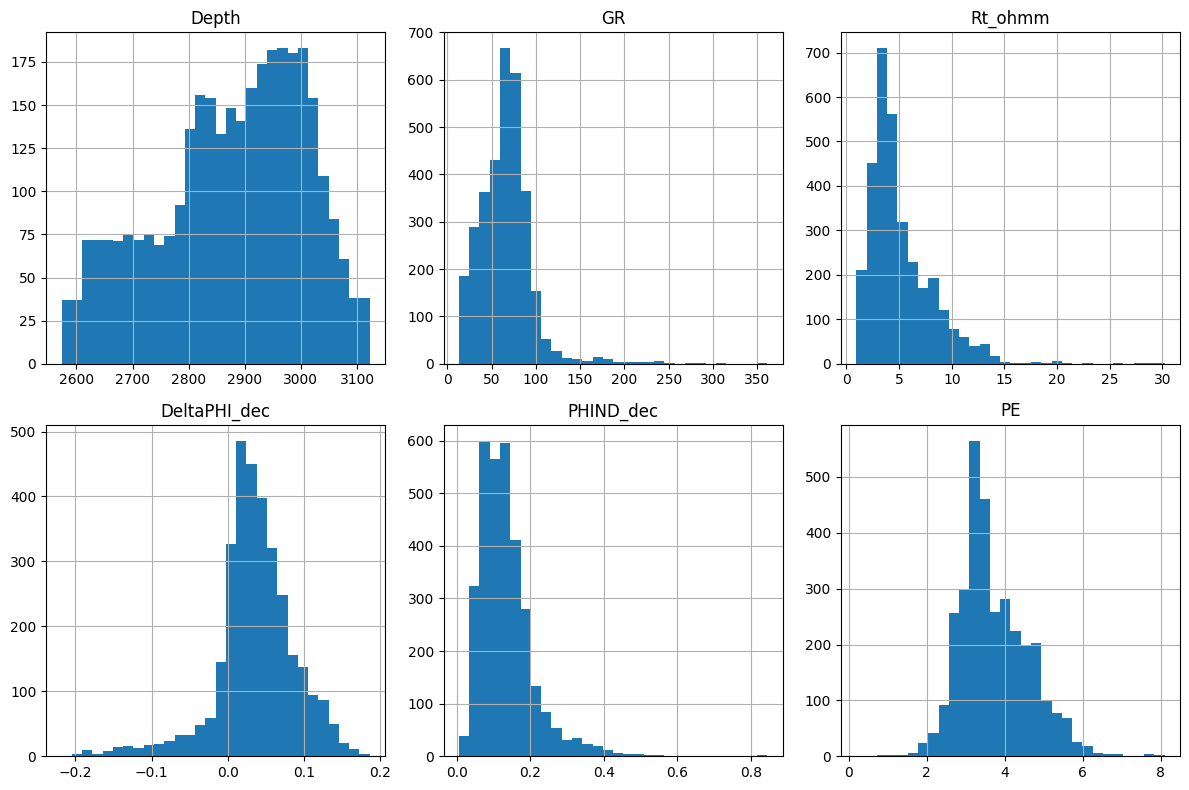

In [16]:
#Create Histogram

stat=df[['Depth','GR','Rt_ohmm','DeltaPHI_dec','PHIND_dec','PE']]
stat.hist(figsize=(12, 8), bins=30, layout=(2, 3))
plt.tight_layout()
plt.show()

**Analysis:**<br>
**GR** shows a right-skewed distribution with around 50–90 API, indicating dominance of sand to silty sand, with fewer shale-rich intervals at higher GR values.

**Resistivity (ohm.m)** is strongly right-skewed with most values below about 7–8 ohm-m, suggesting brine-saturated formations dominate. A small high‑resistivity tail represents hydrocarbon-bearing zones interval.

**DeltaPHI (dec)** shows a near‑normal distribution centered near zero, indicating generally stable porosity measurements. Slight tails reflect shale and fluid effects, which is expected in mixed lithology systems.

**PHIND** is right-skewed with many data around 0.12–0.20 where most porosity values are low to moderate, and high-porosity reservoir zones occur less frequently.

**PE**  displays a multimodal distribution, reflecting mixed lithologies (sandstone, shale, and carbonate).

**2. Data Preprocessing**

In [17]:
#Data Preprocessing

df = df.sort_values("Depth").reset_index(drop=True) #sort depth

depth = df["Depth"]
GR    = df["GR"]
Resistivity = df["Rt_ohmm"]
DeltaPHI_dec = df["DeltaPHI_dec"]
PHIND_dec = df["PHIND_dec"]
PE = df["PE"]
RELPOS = df["RELPOS"]
Facies = df["Facies"]
NM_M = df["NM_M"]






In [18]:
#Define cut off
gr_cutoff = 60       # GR: sand vs shale
Resistivity_cutoff = 10    # Resistitvity: brine vs hydrocarbon (10)

In [25]:
#Preprocessing for plotting data viz
## X limit
GRlim = (0,150) #limit GR plot
Ylim = (depth.min(), depth.max()) #limit Y plot
Resistivitylim = (0.1, 100) #  resistivity range

## Set facies color
facies_colors = {
    1: "#F4D03F", # Facies 1
    2: "#1ABC9C", # Facies 2
    3: "#3498DB", # Facies 3
    4: "#9B59B6", # Facies 4
    5: "#E67E22", # Facies 5
    6: "#E74C3C", # Facies 6
    7: "#2ECC71", # Facies 7
    8: "#95A5A6", # Facies 8
    9: "#7F8C8D" # Facies 9
}


## Preprocessing: Mapping facies to color array
facies_color_array = Facies.map(facies_colors).values


x_left, x_right = 0, 1
facies_img = Facies.values.reshape(-1, 1)

cmap = ListedColormap([facies_colors[i] for i in sorted(facies_colors)])


**3. Data Visualization**

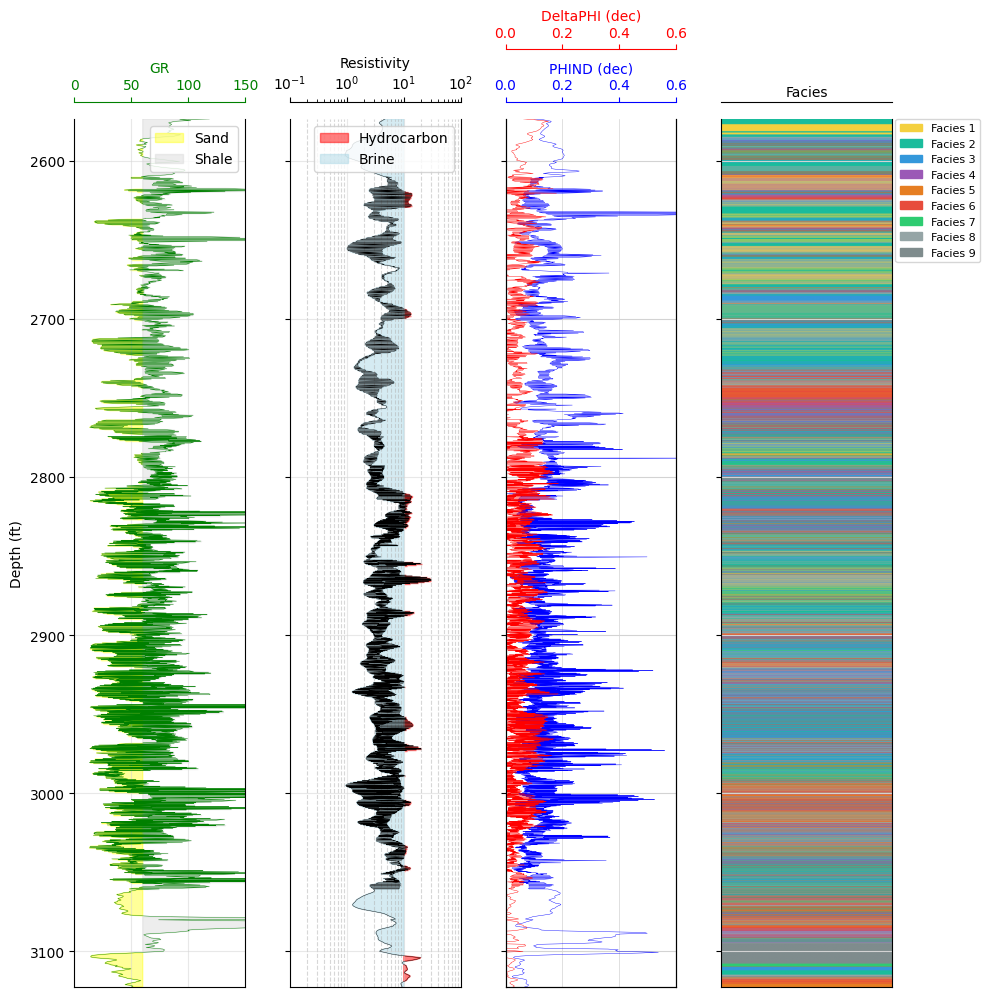

In [26]:
# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    1, 4,
    figsize=(10, 10),
    sharey=True,
    gridspec_kw={'width_ratios': [1, 1, 1, 1]}
)


# ax1 for Gamma Ray
ax1.plot(GR, depth, color='green', linewidth=0.3)
ax1.set_xlabel("GR") #Log header
ax1.xaxis.label.set_color("green") # color for the label
ax1.set_xlim(GRlim)
ax1.set_ylim(Ylim)
ax1.set_ylabel("Depth (ft)") # This is the only track that will show this
ax1.tick_params(axis='x', colors="green") # thick lines
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green') # color for curve title
ax1.set_xticks([0, 50, 100, 150]) # tick lines for GR axes
ax1.invert_yaxis()

# ax2 for Resistivity
ax2.plot(Resistivity, depth, color='black', linewidth=0.3)
ax2.set_xlabel("Resistivity")
ax2.xaxis.label.set_color("black")
ax2.set_xscale("log")    # log scale
ax2.set_xlim(Resistivitylim)
ax2.set_ylim(Ylim)
ax2.invert_yaxis()
ax2.grid(True, which='both', axis='x', linestyle='--', alpha=0.5) #log Grid
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.title.set_color('black')
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
#ax2.set_xticks([0.2, 20, 200]) # tick lines for Res axes


# ax3 for PHIND
ax3.plot(PHIND_dec, depth, color='blue', linewidth=0.3)
ax3.set_xlabel("PHIND (dec)")
ax3.set_xlim(0, 0.6)
ax3.xaxis.label.set_color("blue")
ax3.tick_params(axis='x', colors="blue")
ax3.spines["top"].set_edgecolor("blue")
ax3.set_ylim(Ylim)
ax3.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
ax3.invert_yaxis()
#ax3 double plot for DeltaPhi
ax3_dPHI = ax3.twiny()
ax3_dPHI.plot(DeltaPHI_dec, depth, color='red', linestyle='-', linewidth=0.3)
ax3_dPHI.set_xlim(0, 0.6)
ax3_dPHI.set_xlabel("DeltaPHI (dec)")
ax3_dPHI.xaxis.label.set_color("red")
ax3_dPHI.tick_params(axis='x', colors="red")
ax3_dPHI.spines["top"].set_edgecolor("red")
# adjust label
ax3_dPHI.spines["top"].set_position(("axes", 1.08))
ax3_dPHI.xaxis.set_ticks_position("top")
ax3_dPHI.xaxis.set_label_position("top")

# ax4 for facies log
ax4.imshow(
    facies_img,
    aspect="auto",
    cmap=cmap,
    extent=[0, 1, depth.max(), depth.min()]
)

ax4.set_xlim(x_left, x_right)
ax4.set_ylim(Ylim)
ax4.set_xticks([])
ax4.set_xlabel("Facies")
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.spines["top"].set_position(("axes", 1.02))
ax4.grid(False)
ax4.invert_yaxis()


# Legend
legend_patches = []
for facies_id, color in facies_colors.items():
    # kalau mau label lebih informatif, ganti f"Facies {facies_id}"
    patch = mpatches.Patch(color=color, label=f"Facies {facies_id}")
    legend_patches.append(patch)

ax4.legend(
    handles=legend_patches,
    loc="upper left",
    bbox_to_anchor=(1.02, 1),   # legend di luar track facies
    borderaxespad=0.,
    fontsize=8
)



# COLOR SHADING
## GR Sand shading
ax1.fill_betweenx(
    depth, GR, gr_cutoff,
    where=(GR < gr_cutoff),
    color='yellow', alpha=0.4, label='Sand'
)

## GR Shale shading
ax1.fill_betweenx(
    depth, GR, gr_cutoff,
    where=(GR >= gr_cutoff),
    color='lightgray', alpha=0.4, label='Shale'
)

ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

## Hydrocarbon shading
ax2.fill_betweenx(
    depth, Resistivity_cutoff, Resistivity,
    where=(Resistivity > Resistivity_cutoff),
    color='red', alpha=0.5, label='Hydrocarbon'
)

## Brine shading
ax2.fill_betweenx(
    depth, Resistivity, Resistivity_cutoff,
    where=(Resistivity <= Resistivity_cutoff),
    color='lightblue', alpha=0.5, label='Brine'
)

ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.5)

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))




plt.tight_layout()
plt.show()

**Analysis:**
1. Lithology (Gamma Ray)<br>
The section is dominated by interbedded shale and sandstones. <br>
- Top (2,600–2,800 ft): Frequent fluctuations suggest thin-bedded reservoir units.<br>
- Base (3,050–3,120 ft): A significant clean sand body is visible, indicated by the sharp drop in GR (yellow shading) and low DeltaPHI, suggesting a high-quality reservoir interval.

2. Fluid Identification (Resistivity vs. Porosity) <br>
There is a clear correlation between high resistivity and porosity indicators: <br>
- Hydrocarbon Zones: Noted by the red shading in the Resistivity track (e.g., around 2,820 ft and 3,110 ft). These spikes coincide with low GR (sand) and stable PHIND, signaling potential pay zones. <br>
- Brine Zones: Represented by the light blue shading where resistivity is low < 10 ohm-m , particularly between 3,060 and 3,100 ft, despite the presence of clean sand.

3. Porosity and Facies Correlation <br>
- Porosity: The PHIND (blue) and DeltaPHI (red) tracks show high variability. Significant "crossover" or separation often correlates with the change from Facies 1/2 (Sands) to Facies 7/8/9 (likely tighter or more shaly units).
- Facies Distribution: The rightmost track confirms a highly heterogeneous environment. The shift from cool colors (Facies 2/3) to warm colors (Facies 1/5/6) at the bottom correlates perfectly with the massive sand unit and the resistivity increase at the base of the well.